In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [10]:
import math

In [4]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [6]:
df=df.drop(['area_type','availability','society','balcony'],axis=1)

In [14]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df=df.dropna()

In [15]:
df1=df.copy()

In [16]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df1['bhk']=df1['size'].apply(lambda x:x.split(' ')[0])

In [19]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [32]:
df2=df1.copy()

In [33]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df3=df2[~df2.total_sqft.apply(is_float)]

In [29]:
df2=df2[df2.total_sqft.apply(is_float)]

In [34]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [36]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)

In [38]:
df3.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [40]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']

In [41]:
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [42]:
df3['location']=df3['location'].apply(lambda x:x.strip())

In [68]:
location_stat=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [69]:
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [70]:
location_stat_less_10=location_stat[location_stat<=10]

In [49]:
len(df3.location.unique())

1293

In [71]:
df3['location']=df3['location'].apply(lambda x:"other" if x in location_stat_less_10 else x)

In [54]:
location_stat_less_10

,location
205,10
14,10
471,10
628,10
1034,10
...,...
1,1
647,1
648,1
653,1


In [72]:
len(df3['location'].unique())

242

In [73]:
df3[df3['location']=='other']

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [74]:
df3['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [82]:
df3=df3.apply(pd.to_numeric, errors='ignore')

In [83]:
df3=df3[~(df3.total_sqft/df3.bhk<300)]

In [85]:
df4=df3.copy()

In [87]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [88]:
def remove_out(df):
    df_out=pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        mn=np.mean(sub_df.price_per_sqft)
        sd=np.std(sub_df.price_per_sqft)
        reduced_df=sub_df[(sub_df.price_per_sqft>(mn-sd)) & (sub_df.price_per_sqft<=(mn+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5=remove_out(df4)

In [89]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [98]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


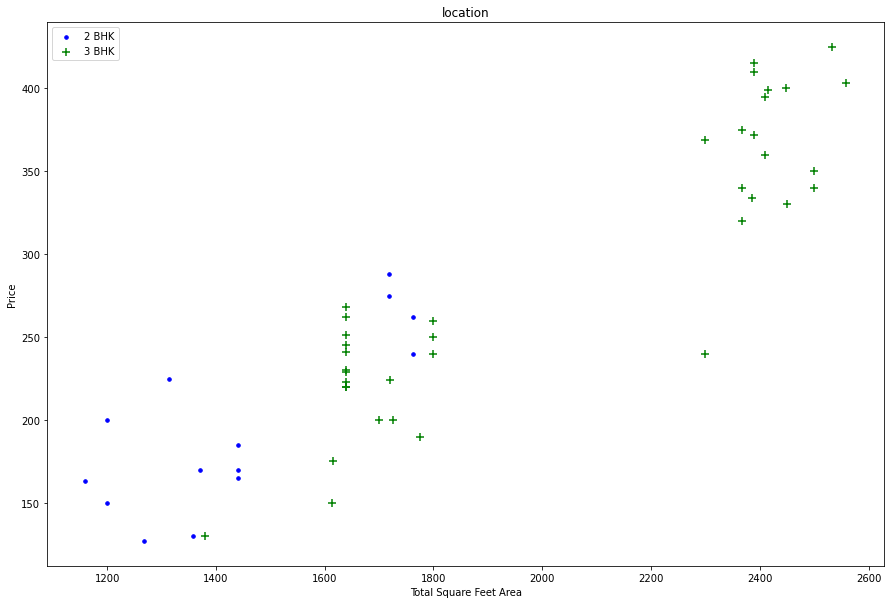

In [93]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker='.',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title("location")
    plt.legend()
plot_scatter_chart(df5,'Rajaji Nagar')

In [145]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6=remove_bhk_outliers(df5)

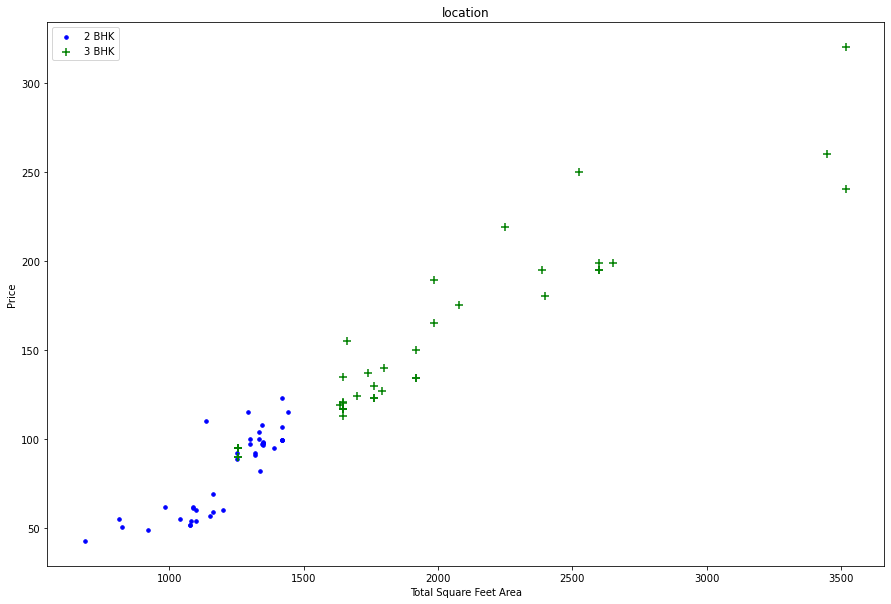

In [150]:
plot_scatter_chart(df6,'Hebbal')

In [155]:
df7=df6[df6.bath<df6.bhk+2]

In [159]:
df8=df7.drop(['size','price_per_sqft'],axis=1)

In [161]:
dummy=pd.get_dummies(df8.location)

In [171]:
df9=pd.concat([df8,dummy.drop('other',axis='columns')],axis='columns')

In [173]:
df10=df9.drop('location',axis='columns')

In [175]:
X=df10.drop('price',axis='columns')
y=df10.price

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [215]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [220]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687460,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.723212,"{'criterion': 'mse', 'splitter': 'best'}"


In [223]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>0:
        x[loc_index]=1
    
    return lr.predict([x])[0]

In [234]:
predict_price('Rajaji Nagar',1000,5,3)

228.69044327120423

In [237]:
import pickle
with open('bangalore_home_prices.pickle','wb') as f:
    pickle.dump(lr,f)

In [238]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("bangalore_columns.json","w") as f:
    f.write(json.dumps(columns))